<a href="https://colab.research.google.com/github/ucfilho/ANN_capstone_projects/blob/master/ANN_Layse_dez_15_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

Trabalho 01

Artigo - Ethanol mediated As(III) adsorption onto Zn-loaded pinecone biochar: Experimental investigation, modeling, and optimization using hybrid artificial neural network-genetic algorithm approach

Discente: Layse Caixeta Ferreira

In [0]:
%matplotlib inline

In [3]:
!git clone https://github.com/laysecaixeta/layse_ANN

Cloning into 'layse_ANN'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 4), reused 12 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [4]:
%cd layse_ANN

/content/layse_ANN


In [5]:
!ls

Dados.Etanol.csv  Novo_Dados_Etanol.csv      Soja_out_03_2018.txt
Dados.Etanol.txt  Polimero_maio_21_2015.txt


In [6]:
DAT=pd.read_csv("Novo_Dados_Etanol.csv")
print(DAT.head())


   Experiment Number  As(III)  Ethanol  pH  Experimental  Predicted (RSM)  \
0                1.0      100       50   6          8.55             8.31   
1                2.0      200       10   6         10.25            10.49   
2                3.0      200       30   8          9.92            10.20   
3                4.0      150       30   6          9.44             9.38   
4                5.0      150       10   4          7.45             7.50   

   Predicted (ANN)  
0             8.55  
1            10.25  
2             9.92  
3             9.40  
4             8.63  


In [7]:
Index=[1,2,3,4]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())


   As(III)  Ethanol  pH  Experimental
0      100       50   6          8.55
1      200       10   6         10.25
2      200       30   8          9.92
3      150       30   6          9.44
4      150       10   4          7.45


In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [10]:
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
print(DAT.head())
print(DAT_OLD.head())


   As(III)  Ethanol   pH  Experimental
0     -1.0      1.0  0.0      0.011628
1      1.0     -1.0  0.0      1.000000
2      1.0      0.0  1.0      0.808140
3      0.0      0.0  0.0      0.529070
4      0.0     -1.0 -1.0     -0.627907
   As(III)  Ethanol  pH  Experimental
0      100       50   6          8.55
1      200       10   6         10.25
2      200       30   8          9.92
3      150       30   6          9.44
4      150       10   4          7.45


In [11]:
train=DAT.sample(frac=0.8,random_state=1)
test=DAT.drop(train.index)
print(train.head())
print("==============")
print(train.shape[0])
print("==============")
print(test.head())
print("==============")
print(test.shape[0])


    As(III)  Ethanol   pH  Experimental
3       0.0      0.0  0.0      0.529070
13     -1.0     -1.0  0.0     -1.000000
7       0.0     -1.0  1.0      0.447674
2       1.0      0.0  1.0      0.808140
6       1.0      0.0 -1.0      0.924419
14
    As(III)  Ethanol   pH  Experimental
5       0.0      0.0  0.0      0.436047
11      1.0      1.0  0.0      0.674419
12      0.0      1.0 -1.0     -0.662791
3


In [12]:
# obtem as variaveis independentes (treino e teste)/ pode ser por nome ou numero
x_train=train.iloc[:,[3]]
x_test=test.iloc[:,[3]]
X_OLD=DAT_OLD.iloc[:,[3]]
print(x_test.head())
print(x_train.head())
print(X_OLD.head())

    Experimental
5       0.436047
11      0.674419
12     -0.662791
    Experimental
3       0.529070
13     -1.000000
7       0.447674
2       0.808140
6       0.924419
   Experimental
0          8.55
1         10.25
2          9.92
3          9.44
4          7.45


In [13]:
# obtem as variaveis dependentes (treino e teste)
Index=[0,1,2]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_test.head())
print(y_train.head())
print(Y_OLD.head())

    As(III)  Ethanol   pH
5       0.0      0.0  0.0
11      1.0      1.0  0.0
12      0.0      1.0 -1.0
    As(III)  Ethanol   pH
3       0.0      0.0  0.0
13     -1.0     -1.0  0.0
7       0.0     -1.0  1.0
2       1.0      0.0  1.0
6       1.0      0.0 -1.0
   As(III)  Ethanol  pH
0      100       50   6
1      200       10   6
2      200       30   8
3      150       30   6
4      150       10   4


In [0]:
# define a rede neural As
Neuron=14
clf_As = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(Neuron), 
                    random_state=1)

In [0]:
# define a rede neural Ethanol
Neuron=14
clf_Ethanol = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(Neuron), 
                    random_state=1)

In [0]:
# define a rede neural pH
Neuron=14
clf_pH = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(Neuron), 
                    random_state=1)

In [17]:
clf_As.fit(x_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=14, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
clf_Ethanol.fit(x_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=14, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
clf_pH.fit(x_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=14, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf_As.predict(x_train)
y_calc_test=clf_As.predict(x_test)
print(y_calc_test) #passar pada dataframe

[[-0.12280644 -0.38461988  0.20304174]
 [ 0.54388598  0.29780507  0.2904388 ]
 [-0.28926461 -0.62084528 -1.01187978]]


In [21]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train) #coluna precisa de nome senao da erro
y_calc_train.columns = col_names
y_calc_test.columns = col_names
print(y_calc_train.head())

    As(III)   Ethanol        pH
0  0.137815 -0.097020  0.234268
1 -1.175290 -0.729157 -0.131489
2 -0.093105 -0.358015  0.204949
3  0.818770  0.230462  0.209295
4  0.943885 -0.321168 -0.071406


In [22]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
print(y_calc_test.head())
print(y_calc_train.head())

      As(III)    Ethanol        pH
0  143.859678  22.307602  6.406083
1  177.194299  35.956101  6.580878
2  135.536770  17.583094  3.976240
      As(III)    Ethanol        pH
0  156.890765  28.059602  6.468536
1   91.235520  15.416863  5.737022
2  145.344758  22.839703  6.409899
3  190.938523  34.609240  6.418590
4  197.194260  23.576634  5.857189


In [0]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [0]:
# escolhe uma das resposta para fazer o grafico (As(III)-treino)
As_obs_train=[]
As_train=[]
As_calc_train=y_calc_train['As(III)'].copy()
As_obs_train=train['As(III)'].copy()

In [25]:
# escolhe uma das resposta para fazer o grafico (As(III)-teste)
As_obs_test=[]
As_calc_test=[]
As_calc_test=y_calc_test['As(III)'].copy()
As_obs_test=test['As(III)'].copy()
print(As_calc_test.head())

0    143.859678
1    177.194299
2    135.536770
Name: As(III), dtype: float64


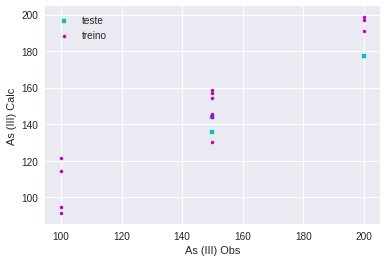

In [26]:
# expressa os dois dados em figura/ c = cor/ marker s quadrado/ matplotlib manual
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(As_obs_test,As_calc_test, s=10, c='c', marker="s", label='teste')
ax1.scatter(As_obs_train,As_calc_train, s=10, c='m', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('As (III) Calc')
plt.xlabel('As (III) Obs')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [28]:
#aumentando o numero de neuronios diminui o erro do teste
mse=mean_squared_error(As_obs_test,As_calc_test)
print("MSE teste=",mse)
R2=r2_score(As_obs_test,As_calc_test)
print("R^2 teste=",R2)

MSE teste= 255.6628623958595
R^2 teste= 0.5398068476874529


In [29]:
mse=mean_squared_error(As_obs_train,As_calc_train)
print("MSE treino=",mse)
R2=r2_score(As_obs_train,As_calc_train)
print("R^2 treino=",R2)

MSE treino= 105.20610065232039
R^2 treino= 0.914967440297506


In [0]:
As_obs_train=[]
As_calc_train=[]
As_calc_train=y_calc_train['Ethanol'].copy()
As_obs_train=train['Ethanol'].copy()

In [31]:
As_obs_test=[]
As_calc_test=[]
As_calc_test=y_calc_test['Ethanol'].copy()
As_obs_test=test['Ethanol'].copy()
print(As_calc_test.head())

0    22.307602
1    35.956101
2    17.583094
Name: Ethanol, dtype: float64


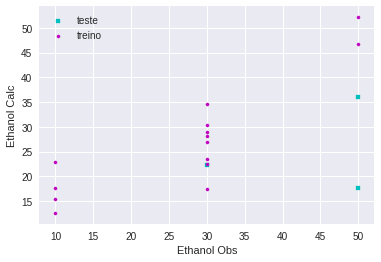

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(As_obs_test,As_calc_test, s=10, c='c', marker="s", label='teste')
ax1.scatter(As_obs_train,As_calc_train, s=10, c='m', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Ethanol Calc')
plt.xlabel('Ethanol Obs')
plt.show()

In [33]:
mse=mean_squared_error(As_obs_test,As_calc_test)
print("MSE teste=",mse)
R2=r2_score(As_obs_test,As_calc_test)
print("R^2 teste=",R2)

MSE teste= 435.75328147261735
R^2 teste= -3.9022244165669457


In [34]:
mse=mean_squared_error(As_obs_train,As_calc_train)
print("MSE treino=",mse)
R2=r2_score(As_obs_train,As_calc_train)
print("R^2 treino=",R2)

MSE treino= 40.38323752294201
R^2 treino= 0.7526526701719801


In [0]:
As_obs_train=[]
As_calc_train=[]
As_calc_train=y_calc_train['pH'].copy()
As_obs_train=train['pH'].copy()

In [36]:
As_obs_test=[]
As_calc_test=[]
As_calc_test=y_calc_test['pH'].copy()
As_obs_test=test['pH'].copy()
print(As_calc_test.head())

0    6.406083
1    6.580878
2    3.976240
Name: pH, dtype: float64


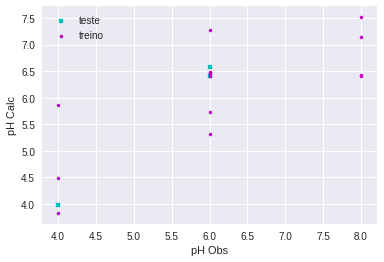

In [37]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(As_obs_test,As_calc_test, s=10, c='c', marker="s", label='teste')
ax1.scatter(As_obs_train,As_calc_train, s=10, c='m', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('pH Calc')
plt.xlabel('pH Obs')
plt.show()

In [38]:
mse=mean_squared_error(As_obs_test,As_calc_test)
print("MSE teste=",mse)
R2=r2_score(As_obs_test,As_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.16762902979981953
R^2 teste= 0.8114173414752031


In [39]:
mse=mean_squared_error(As_obs_train,As_calc_train)
print("MSE treino=",mse)
R2=r2_score(As_obs_train,As_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.9085957181518315
R^2 treino= 0.5410186578408274
